In [ ]:
#ALLAHIM BİSMİLLAH BİTİRDİM AAAAAAAA

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split #,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [ ]:
dataSet=pd.read_csv(("earthquake.csv"), encoding='utf-8', engine='python',sep=',')
data = dataSet[dataSet['country'] == 'turkey']  # dataSet setinde ülke olarak sadece Türkiye'yi bırakıyorum

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         11850 non-null  float64
 1   date       11850 non-null  object 
 2   time       11850 non-null  object 
 3   lat        11850 non-null  float64
 4   long       11850 non-null  float64
 5   country    11850 non-null  object 
 6   city       11728 non-null  object 
 7   area       11735 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      11850 non-null  float64
 11  xm         11850 non-null  float64
 12  md         11850 non-null  float64
 13  richter    11850 non-null  float64
 14  mw         2156 non-null   float64
 15  ms         11850 non-null  float64
 16  mb         11850 non-null  float64
dtypes: float64(11), object(6)
memory usage: 1.6+ MB


In [ ]:
print(data.dtypes)
print(data.iloc[0])

id           float64
date          object
time          object
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object
id           20000000000000.0
date               2003.05.20
time              12:17:44 AM
lat                     39.04
long                    40.38
country                turkey
city                   bingol
area               baliklicay
direction                west
dist                      0.1
depth                    10.0
xm                        4.1
md                        4.1
richter                   0.0
mw                        NaN
ms                        0.0
mb                        0.0
Name: 0, dtype: object


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data.date.apply(lambda x: x.year)
data['month'] = data.date.apply(lambda x: x.month)
data['weekday'] = data.date.apply(lambda x: x.dayofweek)


<ipython-input-26-b54c7db1b6cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-26-b54c7db1b6cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data.date.apply(lambda x: x.year)
<ipython-input-26-b54c7db1b6cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Text(0.5, 0, 'Günler')

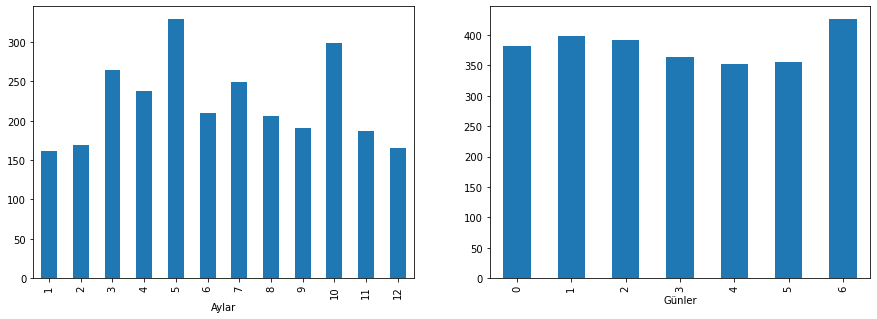

In [ ]:
dataover4 = data[data.richter >= 4]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)                                        # Aylara göre depremlerin yoğunluğu
dataover4.month.value_counts().sort_index().plot.bar()
plt.xlabel('Aylar')
plt.subplot(1,2,2)                                        # Günlere göre depremlerin yoğunluğu
dataover4.weekday.value_counts().sort_index().plot.bar()
plt.xlabel('Günler')

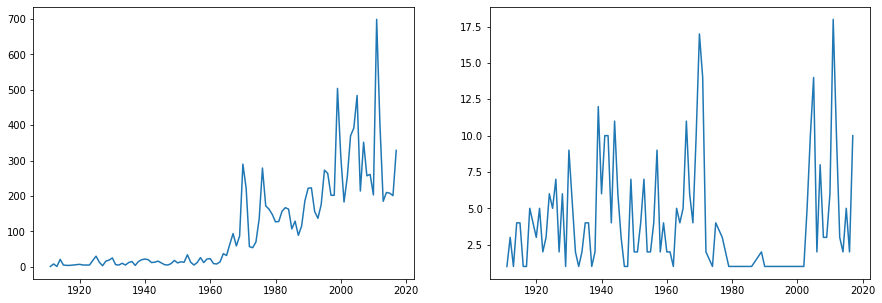

In [ ]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)                                                # Tüm depremlerin yıllara göre dağılımı
plt.plot(data.year.value_counts().sort_index())
plt.subplot(1,2,2)                                                # 4 ten büyük depremlerin yıllara göre dağılımı
plt.plot(data[data.richter >=5].year.value_counts().sort_index())

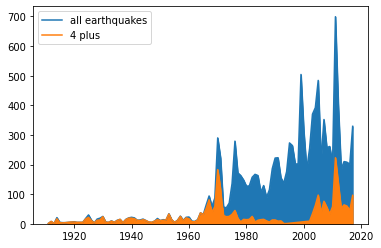

In [ ]:
data.year.value_counts().sort_index(ascending=False).plot.area()  # 4 ten büyük depremlerin tüm depremlerle ilişkisi
data[data.richter >= 4].year.value_counts().sort_index(ascending=False).plot.area()
plt.legend(['all earthquakes', '4 plus'])

In [ ]:
data.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb,year,month,weekday
count,1.185000e+04,11850.000000,11850.000000,10062.000000,11850.000000,11850.000000,11850.000000,11850.000000,2156.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000
mean,1.993997e+13,38.745414,32.987835,3.175015,12.794177,3.979249,2.239924,1.762540,4.459323,0.577105,1.397671,1993.404557,6.483038,3.039072
std,1.922351e+11,1.312692,5.834084,4.715461,16.129368,0.550732,1.993712,2.068619,1.030654,1.561681,2.034418,19.028273,3.361991,2.021049
min,1.910000e+13,35.770000,25.540000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1911.000000,1.000000,0.000000
25%,1.980000e+13,37.730000,28.170000,1.400000,5.000000,3.600000,0.000000,0.000000,4.000000,0.000000,0.000000,1982.000000,4.000000,1.000000
50%,2.000000e+13,38.780000,30.280000,2.300000,8.500000,3.800000,3.500000,0.000000,4.600000,0.000000,0.000000,1999.000000,6.000000,3.000000
75%,2.010000e+13,39.600000,38.600000,3.600000,13.000000,4.200000,3.800000,3.900000,5.000000,0.000000,3.700000,2007.000000,10.000000,5.000000
max,2.020000e+13,46.350000,45.000000,95.400000,180.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000,2017.000000,12.000000,6.000000


In [ ]:
print(data.iloc[0])

id              20000000000000.0
date         2003-05-20 00:00:00
time                 12:17:44 AM
lat                        39.04
long                       40.38
country                   turkey
city                      bingol
area                  baliklicay
direction                   west
dist                         0.1
depth                       10.0
xm                           4.1
md                           4.1
richter                      0.0
mw                           NaN
ms                           0.0
mb                           0.0
year                        2003
month                          5
weekday                        1
Name: 0, dtype: object


In [ ]:
data.drop(['id', 'date', 'time', 'country', 'city', 'area', 'direction', 'dist','mw','xm','ms','year','month','weekday'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 0 to 24006
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lat      11850 non-null  float64
 1   long     11850 non-null  float64
 2   depth    11850 non-null  float64
 3   md       11850 non-null  float64
 4   richter  11850 non-null  float64
 5   mb       11850 non-null  float64
dtypes: float64(6)
memory usage: 648.0 KB


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data.describe() # Min Max %25 fln buluyo NOT: lat long yorumlanabilir verilerdeki 0 değerler kaldırılmalı

,lat,long,depth,md,richter,mb
count,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000
mean,38.745414,32.987835,12.794177,2.239924,1.762540,1.397671
std,1.312692,5.834084,16.129368,1.993712,2.068619,2.034418
min,35.770000,25.540000,0.000000,0.000000,0.000000,0.000000
25%,37.730000,28.170000,5.000000,0.000000,0.000000,0.000000
50%,38.780000,30.280000,8.500000,3.500000,0.000000,0.000000
75%,39.600000,38.600000,13.000000,3.800000,3.900000,3.700000
max,46.350000,45.000000,180.000000,7.400000,7.200000,7.100000


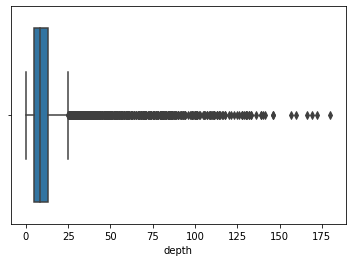

In [ ]:
#outlier data detectliyoruz
data_depth = data["depth"]
data_richter = data["richter"]
data_long = data["long"]
data_lat = data["lat"]
data_md = data["md"]
data_mb = data["mb"]
sns.boxplot(x = data_depth); ## Üst sınırdan itibaren aykırı veriler var şu çizgi çizgiler sondaki , kutu graiği yaptık

In [ ]:
# IQR-> %75lik kısımla %25lik arasındaki fark gibi bişi. DataFrame'den geliyo. R->range
Q1_depth = data_depth.quantile(0.25)
Q3_depth = data_depth.quantile(0.75)
IQR_depth = Q3_depth - Q1_depth 
Q1_lat = data_lat.quantile(0.25)
Q3_lat = data_lat.quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
Q1_long = data_long.quantile(0.25)
Q3_long = data_long.quantile(0.75)
IQR_long = Q3_long - Q1_long
Q1_richter = data_richter.quantile(0.25)
Q3_richter = data_richter.quantile(0.75)
IQR_richter = Q3_richter - Q1_richter
Q1_md = data_md.quantile(0.25)
Q3_md = data_md.quantile(0.75)
IQR_md = Q3_md - Q1_md
Q1_mb = data_mb.quantile(0.25)
Q3_mb = data_mb.quantile(0.75)
IQR_mb = Q3_mb - Q1_mb

In [ ]:
alt_sinir_richter = Q1_richter - 1.5*IQR_richter
ust_sinir_richter = Q3_richter + 1.5*IQR_richter
alt_sinir_md = Q1_md - 1.5*IQR_md
ust_sinir_md = Q3_md + 1.5*IQR_md
alt_sinir_lat = Q1_lat - 1.5*IQR_lat
ust_sinir_lat = Q3_lat + 1.5*IQR_lat
alt_sinir_long = Q1_long - 1.5*IQR_long
ust_sinir_long = Q3_long + 1.5*IQR_long
alt_sinir_mb = Q1_mb - 1.5*IQR_mb
ust_sinir_mb = Q3_mb + 1.5*IQR_mb
alt_sinir_depth = Q1_depth - 1.5*IQR_depth
ust_sinir_depth = Q3_depth + 1.5*IQR_depth

In [ ]:
#aşağıdakilere üst_sinir vs koymadan direkt sayı yazınca tabloda her şeye NaN yazıyo neden olduğunu hala çözemedim

new_data = data.drop(data.index[data['lat'] >= ust_sinir_lat]) # Ust sınır 42 den yuksek olan satırları kaldırdım.
new_data = new_data.drop(new_data.index[new_data['lat'] <= alt_sinir_lat]) # Alt sınır 36 dan kucuk olan satırları kaldırdım.
new_data = new_data.drop(new_data.index[new_data['long'] >= ust_sinir_long]) # Ust sınır 45 ten buyuk olan satırları kaldırdım.
new_data = new_data.drop(new_data.index[new_data['long'] <= alt_sinir_long]) # Alt sınır 26 dan kucuk olan satırları kaldırdım.
new_data = new_data.drop(new_data.index[new_data['richter'] == 0]) # Richter degeri 0 olan satırları kaldırdım.
new_data = new_data.drop(new_data.index[new_data['mb'] == 0]) # Mb degeri 0 olan satırları kaldırdım.
new_data = new_data.drop(new_data.index[new_data['md'] == 0]) # Md degeri 0 olan satırları kaldırdım.
new_data.describe()  # Yukarıda yaptığım işlemlerin doğruluğunu tespit etmek için min max değerlerine baktım.

,lat,long,depth,md,richter,mb
count,1291.000000,1291.00000,1291.000000,1291.000000,1291.000000,1291.000000
mean,39.012742,32.72780,30.323315,4.720372,4.706662,4.743222
std,1.367639,5.28505,22.488805,0.485778,0.474793,0.447827
min,36.000000,25.74000,2.000000,3.500000,3.700000,3.900000
25%,37.965000,29.03500,10.000000,4.300000,4.400000,4.400000
50%,39.030000,30.18000,30.000000,4.700000,4.600000,4.700000
75%,40.040000,36.53000,40.000000,5.000000,4.900000,5.000000
max,42.300000,45.00000,180.000000,7.200000,7.200000,7.100000


<ipython-input-17-3f50303ba182>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))


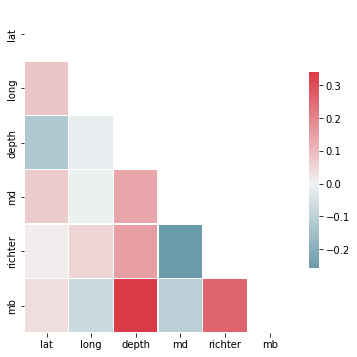

In [ ]:
mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))

plt.figure(figsize = (6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(data.corr(), mask = mask, cmap = cmap, center = 0,
             linewidths = .3, fmt= '.2f', cbar_kws = {"shrink": .6})

In [ ]:
#özdeğerle tahmin edilcek değeri ayırıyoruz bence ayırmasak da olur ama halletcem dur


X=new_data.drop('richter',axis=1,inplace=False) # Tahmin edeceğim sütunu yani ritcher sütununu çıkarıyorum.
y=new_data['richter']

# Veri setinin 20/80 olarak test ve eğitim verileri olmak üzereye ikiye ayırdım.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 21)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(1032, 5)
(1032,)
(259, 5)
(1032,)


In [ ]:
linear=LinearRegression() 
linear.fit(X_train,y_train) #Eğitim verileri

test_veri_skoru=linear.score(X_test,y_test)  # Test verilerinin skoru
print(test_veri_skoru)

print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

y_pred = linear.predict(X_test)

data = pd.DataFrame({'Gerçek': y_test, 'Tahmin': y_pred})
print(data)


0.9697063127440474
coefficients: 
 [-2.38406864e-03  2.45478937e-04 -3.15144736e-04  7.31666055e-01
  2.51519241e-01]
intercepts: 
 0.15432286654705685
      Gerçek    Tahmin
875      3.9  4.004041
318      4.1  4.191079
9517     4.3  4.315844
1606     5.3  5.360285
7745     4.6  4.608419
...      ...       ...
7038     4.3  4.192060
3208     5.0  5.027767
8114     4.6  4.581918
572      4.9  4.961693
9371     4.3  4.291536

[259 rows x 2 columns]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.056870117020785683
Mean Squared Error: 0.007450446992851479
Root Mean Squared Error: 0.0863159718293867


In [ ]:
print(X_train)

         lat   long  depth   md   mb
4942   40.24  28.16   23.0  5.0  5.4
5743   36.47  36.14   10.0  5.1  5.1
11162  40.29  26.15   50.0  5.0  5.1
1350   38.51  39.25   10.0  5.0  5.0
154    39.09  29.59   29.0  4.6  4.6
...      ...    ...    ...  ...  ...
2872   37.31  27.87   15.0  4.0  4.1
380    41.00  33.70   10.0  4.7  4.8
6377   39.28  29.46   17.0  4.8  4.8
10726  36.52  34.34   10.0  5.4  5.4
7999   37.41  29.74   21.0  4.3  4.4

[1032 rows x 5 columns]


In [ ]:
linear_predict_data=np.array([[39.21,41.40,14.0,4.7,4.7]])   # richter değeri : 4.7
tahminDeğeri=linear.predict(linear_predict_data)
print("4.7 ritcher değerine sahip bilgilerin tahmini sonucu çıkan değer:", tahminDeğeri)

4.7 ritcher değerine sahip bilgilerin tahmini sonucu çıkan değer: [4.68756522]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
